In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\tsunami_earthquake_dataset.csv")

In [5]:
print(df)

          date  latitude  longitude  magnitude  depth  tsunami
0   2001-01-01     -60.0      120.0        5.0      5        1
1   2001-06-30     -57.6      118.2        5.6     12        0
2   2001-12-27     -55.2      116.4        6.2     19        0
3   2002-06-25     -52.8      114.6        6.8     26        0
4   2002-12-22     -50.4      112.8        7.4     33        1
5   2003-06-20     -48.0      111.0        8.0     40        0
6   2003-12-17     -45.6      109.2        5.0     47        0
7   2004-06-14     -43.2      107.4        5.6     54        0
8   2004-12-11     -40.8      105.6        6.2     61        1
9   2005-06-09     -38.4      103.8        6.8     68        0
10  2005-12-06     -36.0      102.0        7.4      5        0
11  2006-06-04     -33.6      100.2        8.0     12        0
12  2006-12-01     -31.2       98.4        5.0     19        1
13  2007-05-30     -28.8       96.6        5.6     26        0
14  2007-11-26     -26.4       94.8        6.2     33  

In [7]:
df.head(5)

,date,latitude,longitude,magnitude,depth,tsunami
0,2001-01-01,-60.0,120.0,5.0,5,1
1,2001-06-30,-57.6,118.2,5.6,12,0
2,2001-12-27,-55.2,116.4,6.2,19,0
3,2002-06-25,-52.8,114.6,6.8,26,0
4,2002-12-22,-50.4,112.8,7.4,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       50 non-null     object 
 1   latitude   50 non-null     float64
 2   longitude  50 non-null     float64
 3   magnitude  50 non-null     float64
 4   depth      50 non-null     int64  
 5   tsunami    50 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 2.5+ KB


In [9]:
df.describe()

,latitude,longitude,magnitude,depth,tsunami
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-1.200000,75.900000,6.452000,36.500000,0.260000
std,34.985711,26.239284,1.043393,20.310096,0.443087
min,-60.000000,31.800000,5.000000,5.000000,0.000000
25%,-30.600000,53.850000,5.600000,19.000000,0.000000
50%,-1.200000,75.900000,6.200000,36.500000,0.000000
75%,28.200000,97.950000,7.400000,54.000000,0.750000
max,57.600000,120.000000,8.000000,68.000000,1.000000


In [10]:
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       50 non-null     datetime64[ns]
 1   latitude   50 non-null     float64       
 2   longitude  50 non-null     float64       
 3   magnitude  50 non-null     float64       
 4   depth      50 non-null     int64         
 5   tsunami    50 non-null     int64         
 6   year       50 non-null     int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2)
memory usage: 2.7 KB


In [18]:
df.isnull().sum()

date         0
latitude     0
longitude    0
magnitude    0
depth        0
tsunami      0
year         0
dtype: int64

In [12]:
df.dropna(inplace=True)

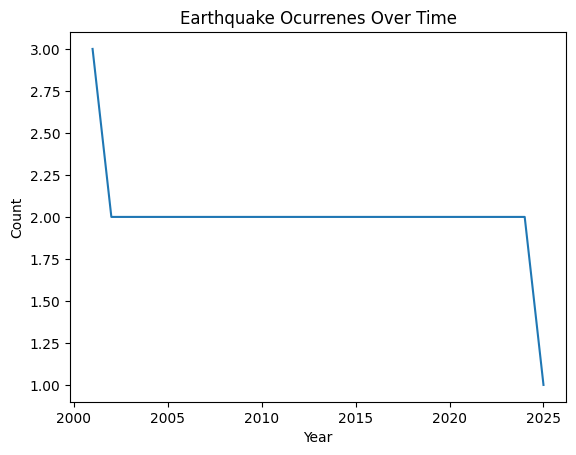

In [15]:
# Time_Based Analysis

plt.figure()
df.groupby('year').size().plot()
plt.title("Earthquake Ocurrenes Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

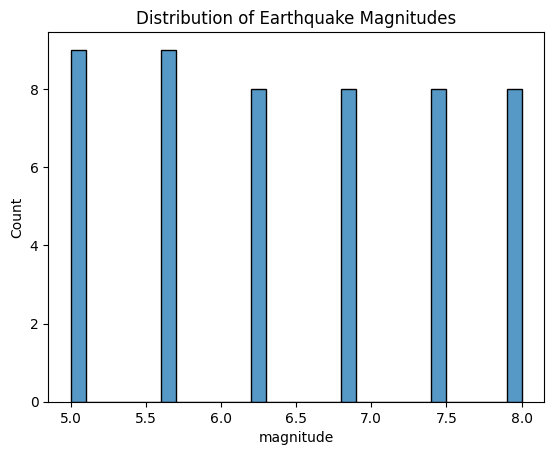

In [27]:
#Magnitude Distribution

plt.figure()
sns.histplot(df['magnitude'],bins=30)
plt.title("Distribution of Earthquake Magnitudes")
plt.show()

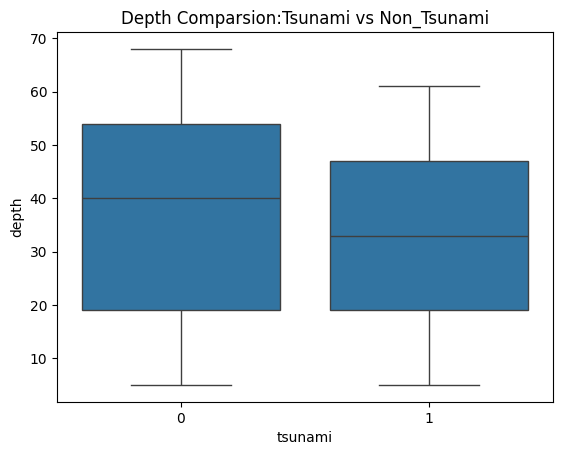

In [20]:
# Depth vs Tsunami Comparsion

plt.figure()
sns.boxplot(x='tsunami',y='depth',data=df)
plt.title("Depth Comparsion:Tsunami vs Non_Tsunami")
plt.show()

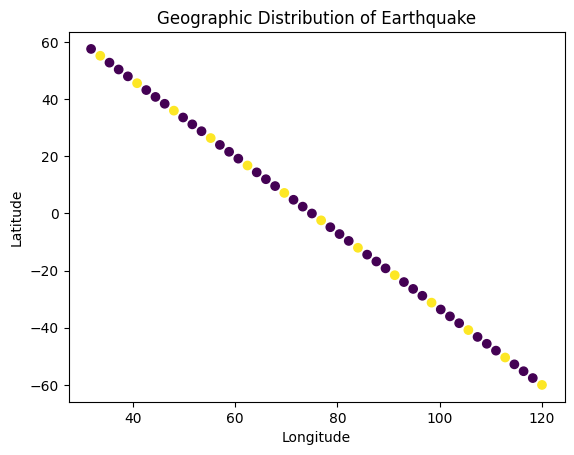

In [22]:
#Geographic Distribution

plt.figure()
plt.scatter (df['longitude'],df['latitude'], c=df['tsunami'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Earthquake")
plt.show()

In [29]:
# Major Earthquakes (Magnitude ≥ 8.0)

major_eq = df[df['magnitude'] >= 8.0]

print("Total Major Earthquakes (Magnitude ≥ 8.0):", major_eq.shape[0])
major_eq.head()

Total Major Earthquakes (Magnitude ≥ 8.0): 8


,date,latitude,longitude,magnitude,depth,tsunami,year,Magnitude_Range
5,2003-06-20,-48.0,111.0,8.0,40,0,2003,7.5–8.0
11,2006-06-04,-33.6,100.2,8.0,12,0,2006,7.5–8.0
17,2009-05-19,-19.2,89.4,8.0,54,0,2009,7.5–8.0
23,2012-05-03,-4.8,78.6,8.0,26,0,2012,7.5–8.0
29,2015-04-18,9.6,67.8,8.0,68,0,2015,7.5–8.0


In [30]:
# Statistical summary of major earthquakes

major_eq[['magnitude', 'depth']].describe()

,magnitude,depth
count,8.0,8.000000
mean,8.0,38.250000
std,0.0,20.408332
min,8.0,12.000000
25%,8.0,22.500000
50%,8.0,40.000000
75%,8.0,54.000000
max,8.0,68.000000


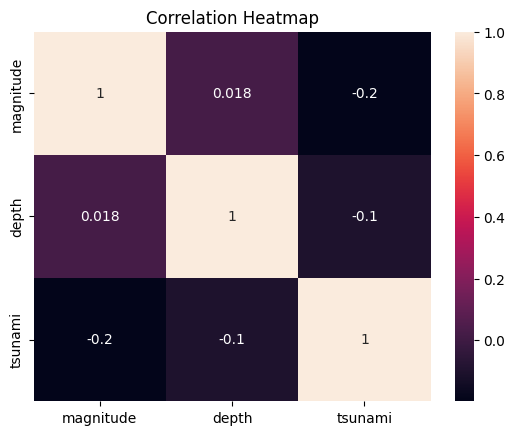

In [24]:
#Correlation Heatmap

plt.figure()
sns.heatmap(df[['magnitude','depth','tsunami']].corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

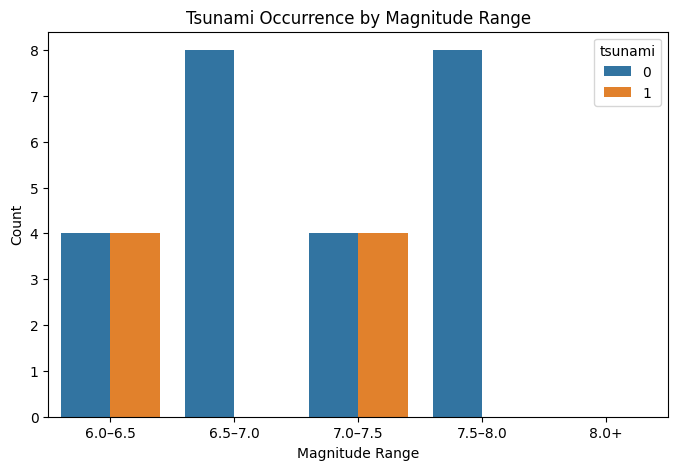

In [25]:
# Magnitude Range vs Tsunami Occurrence

df["Magnitude_Range"] = pd.cut(
    df["magnitude"],
    bins=[6.0, 6.5, 7.0, 7.5, 8.0, 9.5],
    labels=["6.0–6.5", "6.5–7.0", "7.0–7.5", "7.5–8.0", "8.0+"]
)
plt.figure(figsize=(8,5))
sns.countplot(x="Magnitude_Range", hue="tsunami", data=df)
plt.title("Tsunami Occurrence by Magnitude Range")
plt.xlabel("Magnitude Range")
plt.ylabel("Count")
plt.show()